In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm

import pmdarima as pm

In [3]:
## Reading the Excel File
df=pd.read_excel(r"C:\Users\Shilpi\OneDrive\Desktop\PROJECTS\TIME SERIES\CCI.xlsx")
df.head()

,TIME,CONSUMER CONF INDEX
0,2014-01-01,99.33512
1,2014-02-01,99.40863
2,2014-03-01,99.44245
3,2014-04-01,99.51904
4,2014-05-01,99.50475


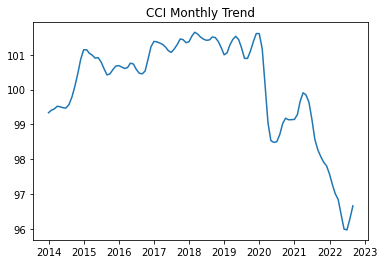

In [4]:
#plot time series
plt.plot(df['TIME'],df['CONSUMER CONF INDEX'])
plt.title('CCI Monthly Trend')

plt.show()

C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


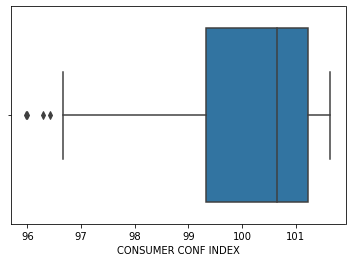

In [5]:
#identify outliers

sns.boxplot(df['CONSUMER CONF INDEX'])
plt.show()
               

In [31]:
#outlier treatment
q1=df['CONSUMER CONF INDEX'].quantile(0.25)
q3=df['CONSUMER CONF INDEX'].quantile(0.75)
iqr=q3-q1

upper=q3+1.5*iqr
lower=q1-1.5*iqr



In [32]:
#iqr 
df['CONSUMER CONF INDEX']=np.where(df['CONSUMER CONF INDEX']>upper,upper,
                                  np.where(df['CONSUMER CONF INDEX']<lower,lower,df['CONSUMER CONF INDEX']))

C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


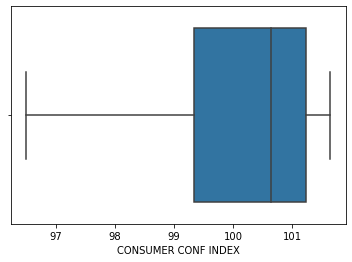

In [33]:
sns.boxplot(df['CONSUMER CONF INDEX'])
plt.show()

In [9]:
#check nulls
df.isna().sum()

TIME                   0
CONSUMER CONF INDEX    0
dtype: int64

In [10]:
#split data into training and test set

In [11]:
df.tail(12)

,TIME,CONSUMER CONF INDEX
93,2021-10-01,98.07962
94,2021-11-01,97.91412
95,2021-12-01,97.81084
96,2022-01-01,97.57133
97,2022-02-01,97.25768
98,2022-03-01,97.01434
99,2022-04-01,96.84113
100,2022-05-01,96.49880
101,2022-06-01,96.49880
102,2022-07-01,96.49880


In [12]:
train_set=df[df['TIME']<'2021-10-01']
train_set

,TIME,CONSUMER CONF INDEX
0,2014-01-01,99.33512
1,2014-02-01,99.40863
2,2014-03-01,99.44245
3,2014-04-01,99.51904
4,2014-05-01,99.50475
...,...,...
88,2021-05-01,99.84676
89,2021-06-01,99.63269
90,2021-07-01,99.15526
91,2021-08-01,98.57474


In [13]:
test_set=df[df['TIME']>='2021-10-01']
test_set

,TIME,CONSUMER CONF INDEX
93,2021-10-01,98.07962
94,2021-11-01,97.91412
95,2021-12-01,97.81084
96,2022-01-01,97.57133
97,2022-02-01,97.25768
98,2022-03-01,97.01434
99,2022-04-01,96.84113
100,2022-05-01,96.49880
101,2022-06-01,96.49880
102,2022-07-01,96.49880


In [14]:
test_set.shape

(12, 2)

In [15]:
#set index to 'date'
train_set['TIME']=pd.to_datetime(train_set['TIME'],infer_datetime_format=True)
train_set.set_index('TIME',inplace=True)

C:\Users\Shilpi\AppData\Local\Temp\ipykernel_21868\90230262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['TIME']=pd.to_datetime(train_set['TIME'],infer_datetime_format=True)


In [16]:
test_set['TIME']=pd.to_datetime(test_set['TIME'],infer_datetime_format=True)
test_set.set_index('TIME',inplace=True)

C:\Users\Shilpi\AppData\Local\Temp\ipykernel_21868\1195303420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['TIME']=pd.to_datetime(test_set['TIME'],infer_datetime_format=True)


In [17]:
#run autoarima to determine best parameters

In [18]:
auto_arima=pm.auto_arima(train_set['CONSUMER CONF INDEX'],
                         seasonal=True,
                         m=12,
                         start_p=1,
                         start_q=1,
                         max_order=None,
                         start_d=1,
                         start_P=0,
                         start_Q=0,
                         max_p=7,
                         max_q=7,
                         max_d=2,
                         max_P=7,
                         max_Q=7,
                         max_D=2,
                         maxiter=100,
                         n_jobs=-1,
                         information_criterion='aic',
                         test='adf',
                         stepwise=True,
                         error_action='ignore',
                         suppress_warnings=True)
auto_arima.fit(train_set['CONSUMER CONF INDEX'])

C:\Users\Shilpi\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


ARIMA(maxiter=100, order=(2, 1, 1), scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
#obtain predictions
test_set['arima_predictions']=auto_arima.predict(len(test_set),dynamic=False,typ='levels')
test_set

C:\Users\Shilpi\AppData\Local\Temp\ipykernel_21868\290211002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['arima_predictions']=auto_arima.predict(len(test_set),dynamic=False,typ='levels')


,CONSUMER CONF INDEX,arima_predictions
TIME,,
2021-10-01,98.07962,98.291594
2021-11-01,97.91412,98.476272
2021-12-01,97.81084,98.661145
2022-01-01,97.57133,98.759720
2022-02-01,97.25768,98.766442
2022-03-01,97.01434,98.721292
2022-04-01,96.84113,98.669724
2022-05-01,96.49880,98.638851
2022-06-01,96.49880,98.633386


# train, test and predicted test

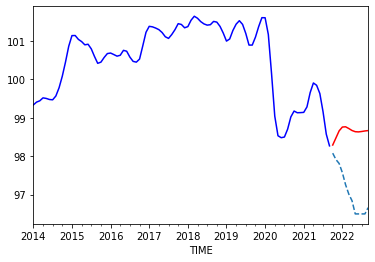

In [21]:
train_set['CONSUMER CONF INDEX'].plot(label='training set',color='b')
test_set['CONSUMER CONF INDEX'].plot(label='test set',linestyle='dashed')
test_set['arima_predictions'].plot(label='predicted test',color='r')

plt.show()


In [22]:
#calculate MAE, MAPE

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['CONSUMER CONF INDEX'],test_set['arima_predictions'])

1.5368361701523934

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_set['CONSUMER CONF INDEX'],test_set['arima_predictions'])

0.01586836235905059

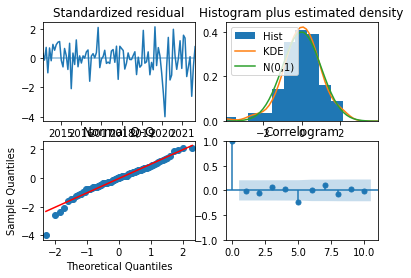

In [25]:
auto_arima.plot_diagnostics()

plt.show()

# retrain model on full data
# ARIMA(2,1,1)(0,0,0)[12]     

In [26]:
df['TIME']=pd.to_datetime(df['TIME'],infer_datetime_format=True)
df.set_index('TIME',inplace=True)

In [27]:
smodel=SARIMAX(df['CONSUMER CONF INDEX'],order=(2,1,1),seasonal_order=(0,0,0,12))
smodel=smodel.fit()

C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shilpi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
sarima_forecast=smodel.predict(len(df),len(df)+11,typ='levels')
sarima_forecast

2022-10-01    96.871053
2022-11-01    97.012597
2022-12-01    97.064143
2023-01-01    97.053863
2023-02-01    97.020425
2023-03-01    96.990817
2023-04-01    96.975429
2023-05-01    96.972870
2023-06-01    96.977101
2023-07-01    96.982563
2023-08-01    96.986265
2023-09-01    96.987619
Freq: MS, Name: predicted_mean, dtype: float64

In [29]:
#plot forecasted values

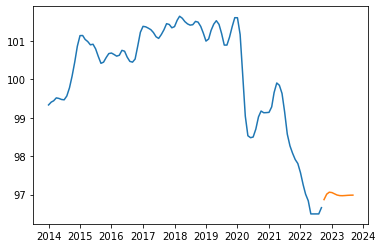

In [30]:
plt.plot(df['CONSUMER CONF INDEX'],label='actual')
plt.plot(sarima_forecast,label='forecasted values')

plt.show()